In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
dataset_df = pd.read_excel('/content/Data-NB.xlsx')

In [27]:
dataset_df['Lab-Test1(30)'] = dataset_df['Lab-Test1(30)'].astype(str).str.strip().astype(float)
dataset_df['Lab-Test2(24)'] = dataset_df['Lab-Test2(24)'].astype(str).str.strip().astype(float)
dataset_df['Midsem Test (90)'] = dataset_df['Midsem Test (90)'].astype(str).str.strip().astype(float)
dataset_df['Gender'] = dataset_df['Gender'].str.strip()
dataset_df['Attendance'] = dataset_df['Attendance'].str.strip()
dataset_df['Grade'] = dataset_df['Grade'].str.strip()

In [28]:
dataset_df.head()

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24.0,66.0,Male,High,A
1,15.00,24.0,67.0,Female,High,A
2,5.25,24.0,45.0,Male,High,B-
3,2.75,19.0,34.0,Male,Low,C-
4,7.25,24.0,30.0,Male,High,C-


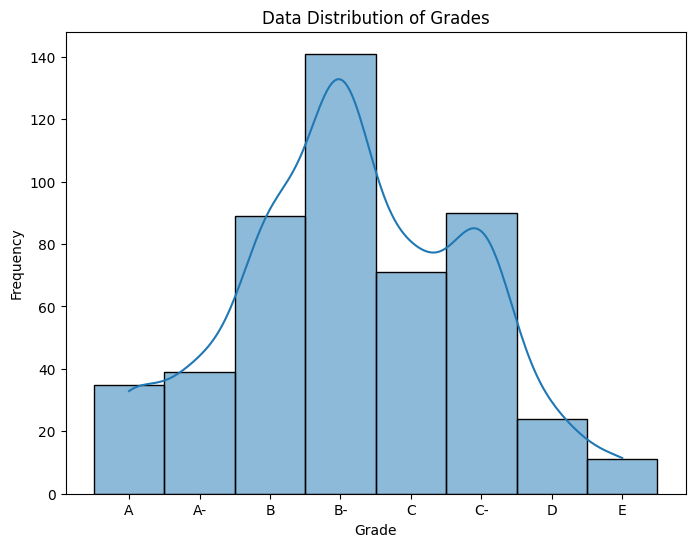

In [29]:
grade_order = ['A', 'A-', 'B', 'B-', 'C', 'C-', 'D', 'E']
dataset_df['Grade'] = pd.Categorical(dataset_df['Grade'], categories=grade_order, ordered=True)

# Plot histogram in order of grades
plt.figure(figsize=(8, 6))
sns.histplot(dataset_df['Grade'], bins=len(grade_order), kde=True)
plt.title('Data Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

In [30]:
dataset_df["Gender"] = dataset_df["Gender"].map({"Male": 1, "Female": 0})
dataset_df["Attendance"] = dataset_df["Attendance"].map({"High": 2, "Moderate": 1,"Low": 0})
dataset_df["Grade"] = dataset_df["Grade"].map({"A": 7, "A-": 6, "B": 5, "B-": 4, "C": 3, "C-": 2, "D": 1, "E": 0})


In [31]:
print(dataset_df.head())

   Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender  Attendance Grade
0          13.00           24.0              66.0       1           2     7
1          15.00           24.0              67.0       0           2     7
2           5.25           24.0              45.0       1           2     4
3           2.75           19.0              34.0       1           0     2
4           7.25           24.0              30.0       1           2     2


In [32]:
train_ds_pd, test_ds_pd = train_test_split(dataset_df, test_size=0.3, random_state=42)
print("{} examples in training, {} examples for testing.".format(len(train_ds_pd), len(test_ds_pd)))

350 examples in training, 150 examples for testing.


In [33]:
X_train = train_ds_pd[['Lab-Test1(30)', 'Lab-Test2(24)', 'Midsem Test (90)', 'Gender', 'Attendance']]
y_train = train_ds_pd['Grade']
X_test = test_ds_pd[['Lab-Test1(30)', 'Lab-Test2(24)', 'Midsem Test (90)', 'Gender', 'Attendance']]
y_test = test_ds_pd['Grade']

# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict grades in the test data
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.7266666666666667
Confusion Matrix:
[[ 6  1  0  0  0  0  0]
 [ 1 27  3  0  0  0  0]
 [ 0  1  8 12  0  0  0]
 [ 0  0  2 38 10  0  0]
 [ 0  0  1  2 15  0  0]
 [ 0  0  0  1  4  6  3]
 [ 0  0  0  0  0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86         7
           2       0.93      0.87      0.90        31
           3       0.57      0.38      0.46        21
           4       0.72      0.76      0.74        50
           5       0.52      0.83      0.64        18
           6       1.00      0.43      0.60        14
           7       0.75      1.00      0.86         9

    accuracy                           0.73       150
   macro avg       0.76      0.73      0.72       150
weighted avg       0.75      0.73      0.72       150



In [34]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

# Split dataset into features and target variable
X_iris = iris_df.drop('target', axis=1)
y_iris = iris_df['target']

# Split data into training and testing subsets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_iris, y_train_iris)

# Predict on test data
y_pred_iris = gnb.predict(X_test_iris)

# Evaluate performance
accuracy = accuracy_score(y_test_iris, y_pred_iris)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test_iris, y_pred_iris)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names)
print("Classification Report:")
print(class_report)


Accuracy: 0.9777777777777777
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



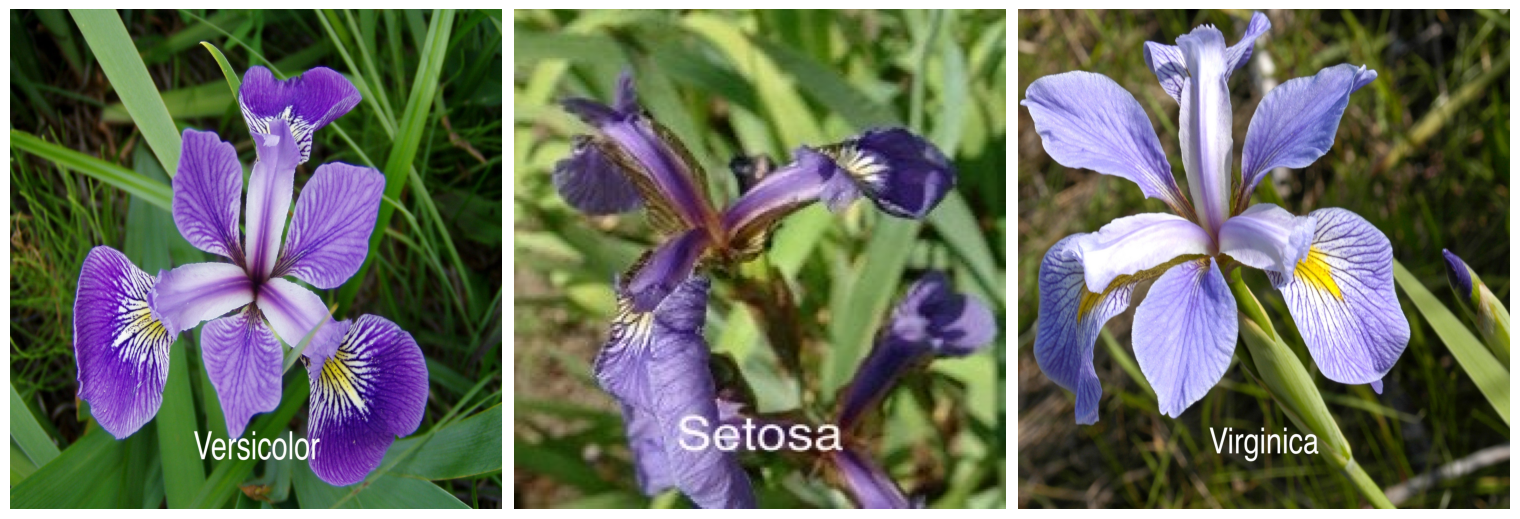

In [35]:
import matplotlib.image as mpimg

# Paths to the image files
image_paths = ["/content/IMG_3181.jpg", "/content/IMG_3180.jpg", "/content/IMG_3182.jpg"]  # Change these to the paths of your images

# Create a figure with 3 subplots in a single row
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.025, 'hspace': 0})  # Adjust the figsize as needed

# Display each image
for i, image_path in enumerate(image_paths):
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].axis('off')  # Turn off axis labels
    axs[i].set_aspect('auto')  # Maintain aspect ratio of the image

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplots to fill the whole figure
plt.show()


#Comparison and Analysis:


*  Random Forest outperforms both Naïve Bayes and Gradient Boosted Trees in terms of accuracy on the given dataset. This is likely because Random Forest is effective in handling a variety of data types, capturing complex relationships, and reducing overfitting.

*  Naïve Bayes, despite its simplicity, lags behind Random Forest and Gradient Boosted Trees in terms of accuracy. This could be due to its strong assumption of feature independence, which may not hold true in the dataset.

*  Gradient Boosted Trees perform slightly worse than Random Forest, but better than Naïve Bayes. While Gradient Boosted Trees can capture complex relationships, they might be more prone to overfitting compared to Random Forest, especially if not properly tuned.

  Overall, the choice of model depends on various factors such as the nature of the data, computational resources, interpretability requirements, and desired level of accuracy.





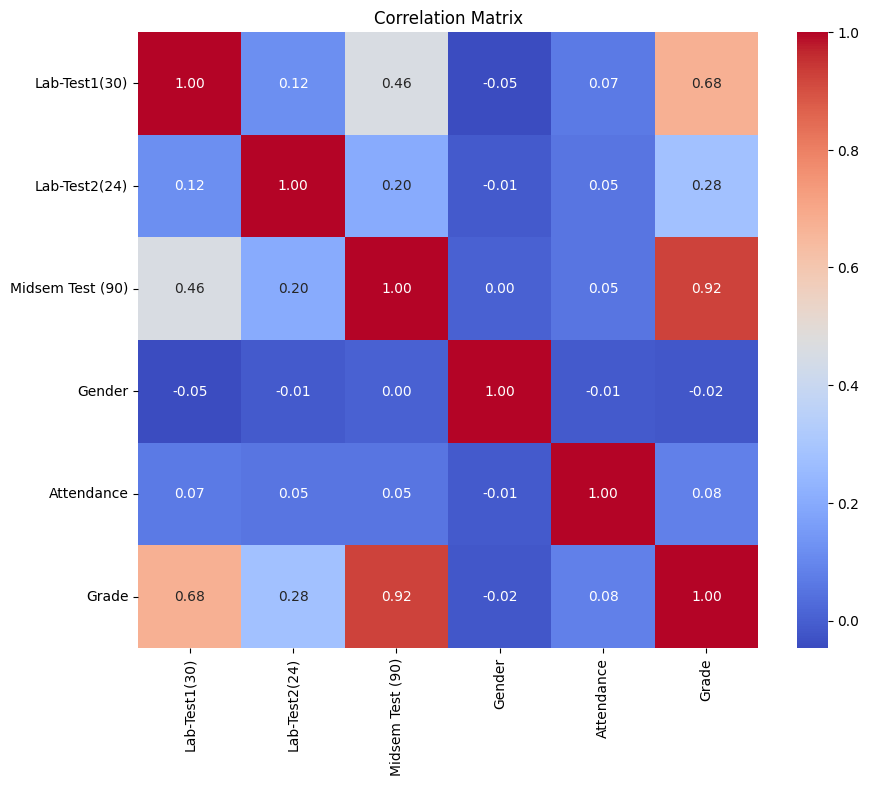

In [36]:
correlation_matrix = dataset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

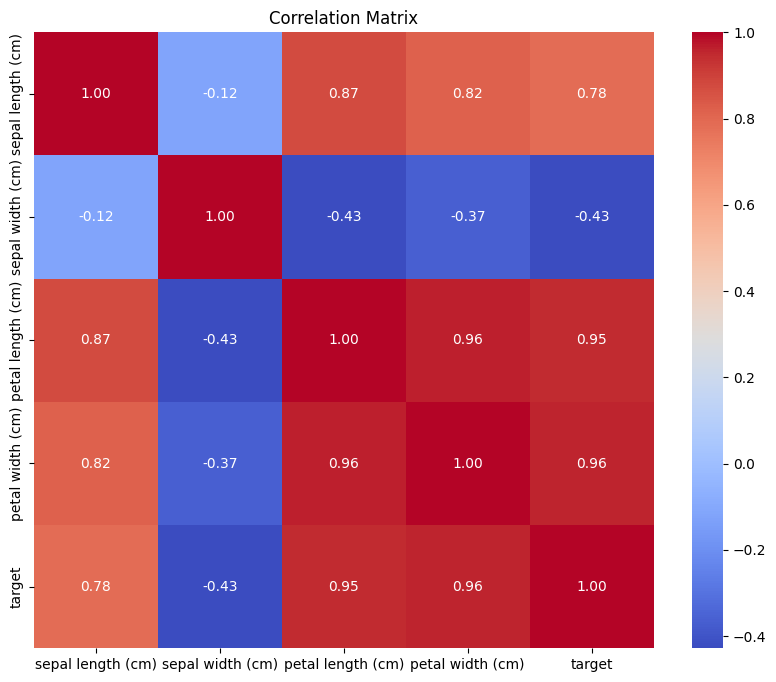

In [37]:
correlation_matrix =iris_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()